### We present the basic notions of machine learning by a hands-on manner in this notebook:

Make sure you have installed anaconda, and created required conda environment. See supplied README.md file.

In [10]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 
# Define some plotting params:
mpl.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid", {"axes.facecolor": ".97"})

#### First we would like to import some example data to work with:
We list the first and then choose the one considering penguins. We also print out the features in the dataset:

In [11]:
display(sns.get_dataset_names())
data = sns.load_dataset('penguins')
data.head()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Then let us quickly plot some of the features out there:

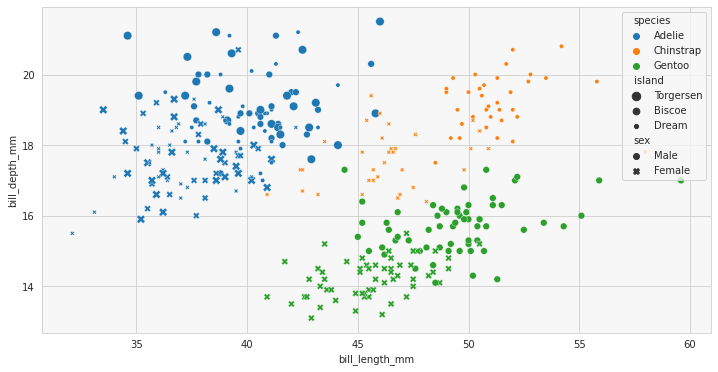

In [12]:
xlabel = 'bill_length_mm'
ylabel = 'bill_depth_mm'

_ = sns.scatterplot(data=data, 
                    x=xlabel, 
                    y=ylabel, 
                    hue='species', 
                    style='sex', 
                    size='island')

#### We now would like to build a classifer $C$ that is cabable of figurein out the species of penguin given the other information in the data.
A classifier $C$ is a mapping from the feature values to probabilites of classes:

$
C : \mathcal{R}^{\text{nfeatures}} \rightarrow \mathcal{R}^{\text{nclasses}}
$

That is, for given instance $\mathbf{x}$ we have $\mathcal{C}(\mathbf{x})=[p_\text{Adelia}, p_\text{Chinstrap}, p_\text{Gentoo}]$, where $p_i$ is the probability for class $i$.

The only thing left to do is to figure out a classifier that could provide such an mapping $\mathcal{C}$. Looking at the figure above it is evident that for any given $\mathbf{x}$ we could consider some 'similarity' measure - how similar this $\mathbf{x}$ is to some instance in the already seen data of penguins. 

Let us propose a classifier of type,

$\mathcal{C}:\mathcal{R}^\text{nfeatures}\rightarrow\mathcal{R}^\text{nclasses}$

$p_i = \mathcal{C}({\mathbf{x}})_i \propto \frac{1}{min(\{ D(\mathbf{x}, \mathbf{x}') : \mathbf{x}' \in X_\text{train} \})}$,

Now the predicted class is always the class corresponding to instance $\mathbf{x}'\in\mathbf{X}_\text{train}$ for which the distance $D(\mathbf{x}, \mathbf{x}')$ is minimized. Such a classifier is called first nearest neighbor classifier for the obvious reason, that it picks the class label for the prediction from the nearest neightbor found in the training data.


### Make knn-classifier class:

In [13]:
class knn_classifier():
    """
    This is a simple knn classifier to demonstrate how one can build a classifier.
    """
    def __init__(self, k=1, X_train=None, y_train=None):
        self.k = k
        self.X_train = X_train.values
        self.y_train = y_train.values
    
    
    def fit(self, X_train, y_train):
        """
        We fit the knn classifier by providing the training data and corresponding labels.
        Args:
            X_train: The training data.
            y_train: The training data class labels.
        Return:
            self:
        """
        self.X_train = X_train.values
        self.y_train = y_train.values
        
        return self
    
    def predict(self, x):
        """
        Predict using the knn classifier.
        Args:
            x: predict for this instance.
        Returns:
            y_pred: predicted class label probabilities.
            neighbor_idxs: list of indices of the nearest neighbors
        """
        if (self.X_train is None) or (y_train is None):
            raise AttributeError('Classifier is not fitted!')
        
        if isinstance(x, pd.Series):
            x = x.values
        
        distances = np.sqrt(((self.X_train - x)**2).sum(axis=1))
        
        sort_idx = distances.argsort()
        
        return self.y_train[sort_idx[:self.k]], sort_idx[:self.k]
        

#### Separate our data into trainig and test sets. You never want to test your classifier using the data that was used to train it! NEVER!

In [14]:
# shuffle the data and drop nans
data = data.sample(frac=1).dropna()
# Drop the categorical features since we do not want to spent time thinking how to measure distances using them. Also the island would specify one of the species uniquely so that is kind of cheating..
X = data.drop(columns=['species', 'sex', 'island'])
X = X.loc[:, [xlabel, ylabel]]
y = data.species

N_train = 300
X_train = X.iloc[:N_train]
y_train = y.iloc[:N_train]
X_test = X.iloc[N_train:]
y_test = y.iloc[N_train:]

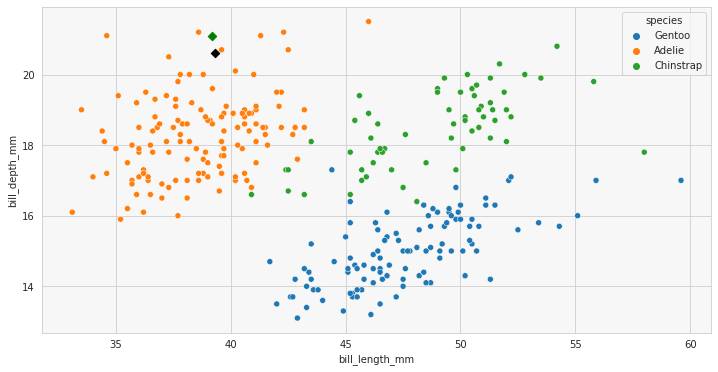

In [17]:
knn = knn_classifier(X_train=X_train, y_train=y_train)
test_idx = 10
y_preds, idxs = knn.predict(X_test.iloc[test_idx])

_ , ax = plt.subplots()
ax = sns.scatterplot(data=X_train, 
                     x=xlabel, 
                     y=ylabel, hue=y_train, ax=ax)

for idx in idxs:
    ax.scatter(X_test.iloc[test_idx][xlabel], X_test.iloc[test_idx][ylabel], marker='D', color='green')
    ax.scatter(X_train.iloc[idx][xlabel], X_train.iloc[idx][ylabel], marker='D', color='black')
plt.show()